# 1. Data Import

In [231]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [232]:
file_path = r'C:\Users\vince\OneDrive\Desktop\UChicago MS DS\3. Spring Quarter 2024\Machine Learning\yelp_dataset\yelp_academic_dataset_business.json'
df= pd.read_json(file_path, lines=True)

In [233]:
df = df[df['is_open']==1]

In [234]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Mailbox Centers, Printing Services","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', 'Wednesday': '8:0-18:30', 'Thursday': '8:0-18:30', 'Friday': '8:0-18:30', 'Saturday': '8:0-14:0'}"
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': 'u'free'', 'Alcohol': 'u'none'', 'Caters': 'True'}","Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0', 'Thursday': '7:0-20:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}"
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': '{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}', 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-22:0', 'Friday': '12:0-22:0', 'Saturday': '12:0-22:0', 'Sunday': '12:0-18:0'}"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCreditCards': 'True', 'RestaurantsAttire': 'u'casual'', 'OutdoorSeating': 'True', 'RestaurantsReservations': 'False', 'Caters': 'False', 'RestaurantsTakeOut': 'True', 'Alcohol': 'u'none'', 'Ambience': 'None', 'GoodForKids': 'True', 'RestaurantsPriceRange2': '1', 'ByAppointmentOnly': 'False', 'CoatCheck': 'False', 'DogsAllowed': 'False', 'RestaurantsTableService': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsDelivery': 'True', 'WiFi': 'u'no'', 'WheelchairAccessible': 'True', 'HasTV': 'True', 'HappyHour': 'False', 'DriveThru': 'True', 'BikeParking': 'False'}","Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', 'Wednesday': '6:0-22:0', 'Thursday': '6:0-22:0', 'Friday': '9:0-0:0', 'Saturday': '9:0-22:0', 'Sunday': '8:0-22:0'}"
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'RestaurantsPriceRange2': '2', 'BikeParking': 'True', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}'}","Sporting Goods, Fashion, Shoe Stores, Shopping, Sports Wear, Accessories","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18:0', 'Thursday': '10:0-18:0', 'Friday': '10:0-18:0', 'Saturday': '10:0-18:0', 'Sunday': '12:0-18:0'}"


In [235]:
drop_columns = ['is_open','hours','review_count', 'attributes']
df = df.drop(drop_columns, axis=1)

In [236]:
business_R = df[df['categories'].str.contains('Restaurants', case=False, na=False)]

In [237]:
business_R.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,categories
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries"
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,"Burgers, Fast Food, Sandwiches, Food, Ice Cream & Frozen Yogurt, Restaurants"
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,"Ice Cream & Frozen Yogurt, Fast Food, Burgers, Restaurants, Food"
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,"Vietnamese, Food, Restaurants, Food Trucks"
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,"American (Traditional), Restaurants, Diners, Breakfast & Brunch"


In [238]:
# I am filtering for the most common restaurants in Yelp
top_1 = business_R.name.value_counts().sort_values(ascending = False).head(1).index
top_1

Index(['McDonald's'], dtype='object', name='name')

In [239]:
filtered_business_R = business_R[business_R['name'].isin(top_1)]

In [240]:
filtered_business_R.shape[0]

655

In [241]:
size = 1000000

review_json_path = r'C:\Users\vince\OneDrive\Desktop\UChicago MS DS\3. Spring Quarter 2024\Machine Learning\yelp_dataset\yelp_academic_dataset_review.json'

review = pd.read_json(review_json_path, lines=True,
                      dtype={'review_id':str,'user_id':str,
                             'business_id':str,'stars':int,
                             'date':str,'text':str,'useful':int,
                             'funny':int,'cool':int},
                      chunksize=size)

In [242]:
chunk_list = []
for chunk_review in review:
    chunk_review = chunk_review.drop(['review_id','useful','funny','cool'], axis=1)
    chunk_review = chunk_review.rename(columns={'stars': 'review_stars'})
    chunk_merged = pd.merge(filtered_business_R, chunk_review, on='business_id', how='inner')
    print(f"{chunk_merged.shape[0]} out of {size:,} related reviews")
    chunk_list.append(chunk_merged)
df = pd.concat(chunk_list, ignore_index=True, join='outer', axis=0)

2326 out of 1,000,000 related reviews
2486 out of 1,000,000 related reviews
2632 out of 1,000,000 related reviews
2391 out of 1,000,000 related reviews
2168 out of 1,000,000 related reviews
2250 out of 1,000,000 related reviews
3056 out of 1,000,000 related reviews


In [126]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,categories,user_id,review_stars,text,date
0,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",6z3PRqgD0ZRzo3JWA2XGiQ,1,If you can't come to work with pride and energy and enthusiasm then don't work at a McDonald's where people are in a hurry to get somewhere else.....so disappointed in the behavior of humans!,2018-01-09 21:23:02
1,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",bQ_qlqlZRFgfRlqveB-ILg,2,Not the greatest fast food place to hit at night.\n\nI was driving through one night and had to stop and use the restroom and get some food. The employees looked at me with almost disqust that I was in there. Not that I'm one of those people but maybe I was the wrong white girl in the wrong neighborhood at the wrong time? Not really sure. It's pretty much almost downtown past the arch right off 70 so it was convenient. It was pretty clean for the most part as well. Just didn't like the whole vibe going on inside.,2010-11-24 21:44:42
2,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",u6BkvWb1F2noZfwCYTJQ2g,4,I went to this McDonald's for a family birthday party. My grandson wanted his 5th birthday party to be here and he loved it! We brought a cake and many family and friends and it was just great. I even brought some of my hip hop students and we preformed a routine. The only thing that made me rate my experience 4 stars was while I was doing my hip hop routine some of the employees proceeded to laugh at me and my dancers. Some even video taped me! Like can't you youngsters just let a 56 year old pop and lock with her crew?,2017-12-31 02:34:50
3,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",2M3xrhIK3vg7wQO6jxT1rg,1,"I almost committed suicide at this McDonald's it was so bad, can't believe I am even writing a yelp review on a McDonald's.",2018-06-20 21:21:52
4,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",1dsyxWko75HEyxPew6YovA,1,"Could be the worst McDonalds that I have ever been to, service wise. I waited in drive thru for over 5 minutes and didn't move. Went inside because there were only two people in line. No one was taking orders. An employee said the counter girl was in the bathroom. There were several people just standing around. One person said she couldn't help us because she hadn't clocked in yet. When I got to order i chose a #3, but still had to wait for fries. I asked for my burger and drink so I could leave. The staff couldn't understand me leaving without my fries. I will never return to this McDonalds",2016-11-10 21:42:25


In [243]:
df.shape[0]

17309

In [244]:
print("Min Date", df['date'].min())
print("Max Date", df['date'].max())

Min Date 2006-07-19 01:28:35
Max Date 2022-01-19 15:22:00


# 2. Data Cleaning

In [245]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [246]:
# Strip whitespaces and replace newlines
df['text'] = df['text'].str.strip().str.replace('\n', ' ')
# Convert text to lowercase
df['text'] = df['text'].str.lower()
# Remove special characters and punctuations
df['text'] = df['text'].map(lambda x: re.sub(r'[^a-zA-Z0-9 @.,:-_]', '', x))

In [247]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
stop_words.update(['facebook'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vince\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [248]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [249]:
df =  df.copy() 
df['clean_review'] = df['text'].apply(preprocess_text)

In [250]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,categories,user_id,review_stars,text,date,clean_review
0,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",6z3PRqgD0ZRzo3JWA2XGiQ,1,if you cant come to work with pride and energy and enthusiasm then dont work at a mcdonalds where people are in a hurry to get somewhere else.....so disappointed in the behavior of humans,2018-01-09 21:23:02,cant come work pride energy enthusiasm dont work mcdonalds people hurry get somewhere else ..... disappointed behavior human
1,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",bQ_qlqlZRFgfRlqveB-ILg,2,not the greatest fast food place to hit at night. i was driving through one night and had to stop and use the restroom and get some food. the employees looked at me with almost disqust that i was in there. not that im one of those people but maybe i was the wrong white girl in the wrong neighborhood at the wrong time? not really sure. its pretty much almost downtown past the arch right off 70 so it was convenient. it was pretty clean for the most part as well. just didnt like the whole vibe going on inside.,2010-11-24 21:44:42,greatest fast food place hit night . driving one night stop use restroom get food . employee looked almost disqust . im one people maybe wrong white girl wrong neighborhood wrong time ? really sure . pretty much almost downtown past arch right 70 convenient . pretty clean part well . didnt like whole vibe going inside .
2,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",u6BkvWb1F2noZfwCYTJQ2g,4,i went to this mcdonalds for a family birthday party. my grandson wanted his 5th birthday party to be here and he loved it we brought a cake and many family and friends and it was just great. i even brought some of my hip hop students and we preformed a routine. the only thing that made me rate my experience 4 stars was while i was doing my hip hop routine some of the employees proceeded to laugh at me and my dancers. some even video taped me like cant you youngsters just let a 56 year old pop and lock with her crew?,2017-12-31 02:34:50,went mcdonalds family birthday party . grandson wanted 5th birthday party loved brought cake many family friend great . even brought hip hop student preformed routine . thing made rate experience 4 star hip hop routine employee proceeded laugh dancer . even video taped like cant youngster let 56 year old pop lock crew ?
3,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",2M3xrhIK3vg7wQO6jxT1rg,1,"i almost committed suicide at this mcdonalds it was so bad, cant believe i am even writing a yelp review on a mcdonalds.",2018-06-20 21:21:52,"almost committed suicide mcdonalds bad , cant believe even writing yelp review mcdonalds ."
4,yM8LlTInbQH4FwWC97lz6w,McDonald's,1919 S Jefferson,St. Louis,MO,63104,38.612495,-90.221942,1.5,"Fast Food, Restaurants, Food, Burgers, Coffee & Tea",1dsyxWko75HEyxPew6YovA,1,"could be the worst mcdonalds that i have ever been to, service wise. i waited in drive thru for over 5 minutes and didnt move. went inside because there were only two people in line. no one was taking orders. an employee said the counter girl was in the bathroom. there were several people just standing around. one person said she couldnt help us because she hadnt clocked in yet. when i got to order i chose a 3, but still had to wait for fries. i asked for my burger and drink so i could leave. the staff couldnt understand me leaving without my fries. i will never return to this mcdonalds",2016-11-10 21:42:25,"could worst mcdonalds ever , service wise . waited drive thru 5 minute didnt move . w

In [251]:
pd.set_option('display.max_colwidth', None)
df[['clean_review', 'text']]

,clean_review,text
0,cant come work pride energy enthusiasm dont work mcdonalds people hurry get somewhere else ..... disappointed behavior human,if you cant come to work with pride and energy and enthusiasm then dont work at a mcdonalds where people are in a hurry to get somewhere else.....so disappointed in the behavior of humans
1,greatest fast food place hit night . driving one night stop use restroom get food . employee looked almost disqust . im one people maybe wrong white girl wrong neighborhood wrong time ? really sure . pretty much almost downtown past arch right 70 convenient . pretty clean part well . didnt like whole vibe going inside .,not the greatest fast food place to hit at night. i was driving through one night and had to stop and use the restroom and get some food. the employees looked at me with almost disqust that i was in there. not that im one of those people but maybe i was the wrong white girl in the wrong neighborhood at the wrong time? not really sure. its pretty much almost downtown past the arch right off 70 so it was convenient. it was pretty clean for the most part as well. just didnt like the whole vibe going on inside.
2,went mcdonalds family birthday party . grandson wanted 5th birthday party loved brought cake many family friend great . even brought hip hop student preformed routine . thing made rate experience 4 star hip hop routine employee proceeded laugh dancer . even video taped like cant youngster let 56 year old pop lock crew ?,i went to this mcdonalds for a family birthday party. my grandson wanted his 5th birthday party to be here and he loved it we brought a cake and many family and friends and it was just great. i even brought some of my hip hop students and we preformed a routine. the only thing that made me rate my experience 4 stars was while i was doing my hip hop routine some of the employees proceeded to laugh at me and my dancers. some even video taped me like cant you youngsters just let a 56 year old pop and lock with her crew?
3,"almost committed suicide mcdonalds bad , cant believe even writing yelp review mcdonalds .","i almost committed suicide at this mcdonalds it was so bad, cant believe i am even writing a yelp review on a mcdonalds."
4,"could worst mcdonalds ever , service wise . waited drive thru 5 minute didnt move . went inside two people line . one taking order . employee said counter girl bathroom . several people standing around . one person said couldnt help u hadnt clocked yet . got order chose 3 , still wait fry . asked burger drink could leave . staff couldnt understand leaving without fry . never return mcdonalds","could be the worst mcdonalds that i have ever been to, service wise. i waited in drive thru for over 5 minutes and didnt move. went inside because there were only two people in line. no one was taking orders. an employee said the counter girl was in the bathroom. there were several people just standing around. one person said she couldnt help us because she hadnt clocked in yet. when i got to order i chose a 3, but still had to wait for fries. i asked for my burger and drink so i could leave. the staff couldnt understand me leaving without my fries. i will never return to this mcdonalds"
...,...,...
17304,"playplace , great give kid time blow steam . drive thru take quite get , nearly bad location west end plainfield . avoid one cost . part order correct .","it has a playplace, which is great just to give the kids time to blow off steam. the drive thru takes quite a while to get through, but its not nearly as bad as the location on the west end of plainfield. avoid that one at all cost. for the most part my orders have been correct."
17305,"order wrong , gave two filet fish . considered attempted manslaughter . also asked ranch honey mustard guy brought food told id pay even though asked window .","not only was my order wrong, they gave me two filet o fish. that should be considered attempted manslaughter. i also asked for ranch and honey mus

# 3. EDA

In [252]:
df['review_stars'].value_counts()

review_stars
1    11678
2     1750
5     1550
3     1236
4     1095
Name: count, dtype: int64

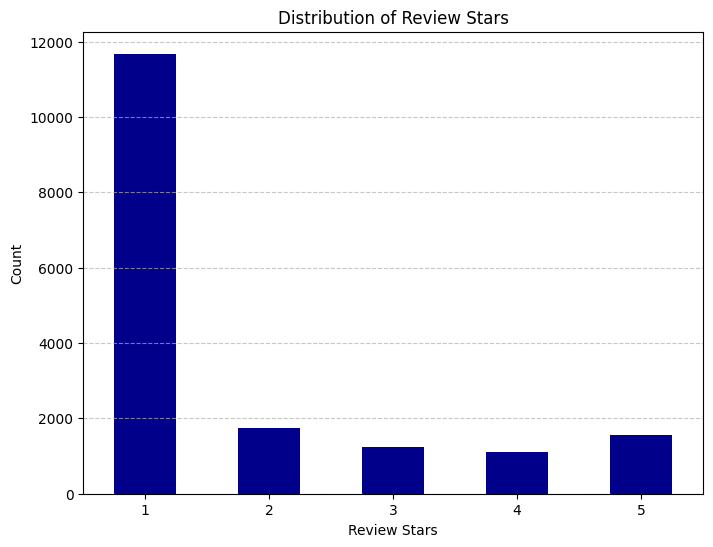

In [253]:
star_counts = df['review_stars'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
star_counts.plot(kind='bar', color='darkblue')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [256]:
df_original = df.copy()

In [254]:
test = df[df['review_stars'].isin([1, 5])]

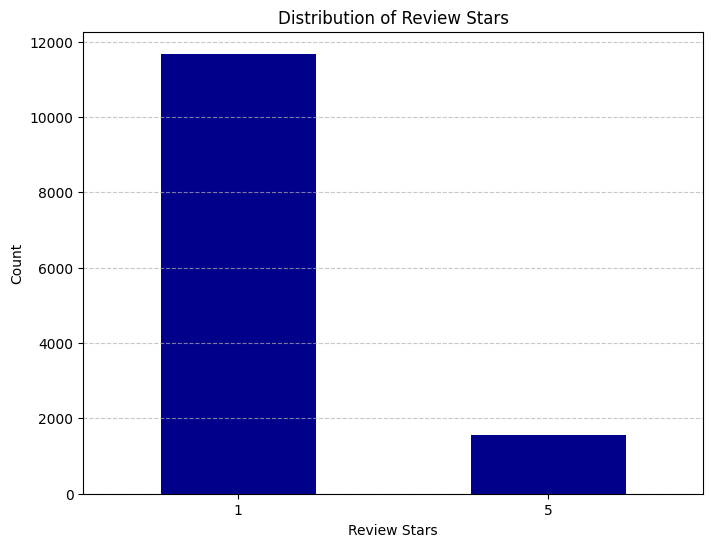

In [255]:
star_counts = test['review_stars'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
star_counts.plot(kind='bar', color='darkblue')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [257]:
class_counts = test['review_stars'].value_counts()

# Find the number of instances in the smallest class
min_class_size = class_counts.min()

# Perform undersampling
undersampled_df = pd.DataFrame()  
for review_star, group in test.groupby('review_stars'):
    sample_size = min(len(group), min_class_size)  
    undersampled_group = group.sample(n=sample_size, random_state=42)  
    undersampled_df = pd.concat([undersampled_df, undersampled_group], axis=0)

# Shuffle the DataFrame rows
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
undersampled_df['review_stars'].value_counts()

review_stars
1    1550
5    1550
Name: count, dtype: int64

In [258]:
df = undersampled_df.copy() 

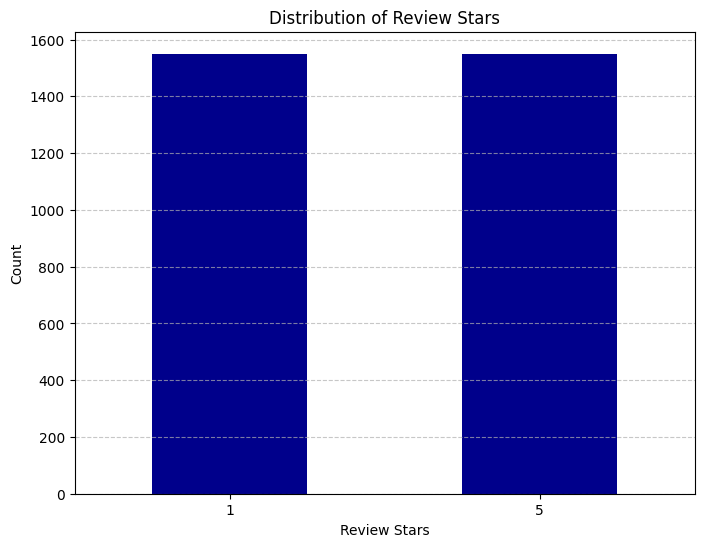

In [259]:
star_counts = df['review_stars'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
star_counts.plot(kind='bar', color='darkblue')
plt.title('Distribution of Review Stars')
plt.xlabel('Review Stars')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## EDA: Topic Modeling

In [260]:
from bertopic import BERTopic

In [262]:
docs_combined = df_original['clean_review'].tolist()

In [267]:
topic_model = BERTopic(language="english", min_topic_size=40, n_gram_range=(1,2), calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs_combined)

2024-05-22 22:26:14,257 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 541/541 [06:26<00:00,  1.40it/s]
2024-05-22 22:32:41,889 - BERTopic - Embedding - Completed ✓
2024-05-22 22:32:41,889 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-22 22:32:56,051 - BERTopic - Dimensionality - Completed ✓
2024-05-22 22:32:56,051 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-22 22:32:59,970 - BERTopic - Cluster - Completed ✓
2024-05-22 22:32:59,979 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-22 22:33:04,287 - BERTopic - Representation - Completed ✓


## EDA: Wordcloud

In [268]:
freq = topic_model.get_topic_info()
print(f"Topics found: {freq.shape[0]}")
freq[['Name', 'Representation']]

Topics found: 24


,Name,Representation
0,-1_order_mcdonalds_food_time,"[order, mcdonalds, food, time, get, one, drive, service, go, location]"
1,0_order_drive_window_rude,"[order, drive, window, rude, minute, manager, get, food, thru, time]"
2,1_fry_nugget_chicken_burger,"[fry, nugget, chicken, burger, ordered, got, sauce, pounder, quarter, quarter pounder]"
3,2_mcdonalds_food_location_good,"[mcdonalds, food, location, good, always, service, friendly, clean, best, one]"
4,3_mcdonalds_worst_worst mcdonalds_ever,"[mcdonalds, worst, worst mcdonalds, ever, order, service, ive, employee, time, go]"
5,4_star_give_could_could give,"[star, give, could, could give, would, star would, zero, zero star, order, drive]"
6,5_table_dirty_floor_bathroom,"[table, dirty, floor, bathroom, place, clean, area, disgusting, trash, food]"
7,6_mcdonalds_slowest_minute_slowest mcdonalds,"[mcdonalds, slowest, minute, slowest mcdonalds, time, drive, wait, line, ever, food]"
8,7_open_closed_hour_24,"[open, closed, hour, 24, 24 hour, close, say, closing, drive, time]"
9,8_egg_sausage_mcmuffin_breakfast,"[egg, sausage, mcmuffin, breakfast, cheese, egg mcmuffin, biscuit, bacon, egg cheese, hash brown]"


In [269]:
relevant_topics = [1,2,6,7,8,9,10,11,13,15,17,18,20,21]
# relevant_topics

In [270]:
freq[freq['Topic'].isin(relevant_topics)][['Topic', 'Representation']]

,Topic,Representation
2,1,"[fry, nugget, chicken, burger, ordered, got, sauce, pounder, quarter, quarter pounder]"
3,2,"[mcdonalds, food, location, good, always, service, friendly, clean, best, one]"
7,6,"[mcdonalds, slowest, minute, slowest mcdonalds, time, drive, wait, line, ever, food]"
8,7,"[open, closed, hour, 24, 24 hour, close, say, closing, drive, time]"
9,8,"[egg, sausage, mcmuffin, breakfast, cheese, egg mcmuffin, biscuit, bacon, egg cheese, hash brown]"
10,9,"[great, food, friendly, service, location, staff, always, good, clean, place]"
11,10,"[ice cream, ice, cream, machine, cream machine, broken, mcflurry, cone, mcdonalds, machine broken]"
12,11,"[review, mcdonalds, yelp, food, star, time, one, order, place, fast]"
14,13,"[mcds, mcd, worst mcds, worst, ever, food, time, get, mcds ever, one]"
16,15,"[mask, wearing, glove, wearing mask, nose, wear, employee, wear mask, chin, wearing glove]"


In [272]:
df_original['topic'] = topics 
df_filtered = df_original[df_original['topic'].isin(relevant_topics)]
df_filtered = df_filtered.reset_index(drop=True)

## EDA: Sentiment Word Cloud

In [273]:
from wordcloud import WordCloud
import flair
from tqdm import tqdm
from flair.models import TextClassifier
from flair.data import Sentence

In [274]:
classifier = TextClassifier.load("en-sentiment")

In [275]:
sentiments = []

for text in tqdm(df_filtered['clean_review']):
    sentence = Sentence(text)
    classifier.predict(sentence)
    sentiments.append(sentence.labels[0].to_dict())

df_filtered['sentiment'] = sentiments


100%|██████████| 4437/4437 [04:11<00:00, 17.63it/s]


In [276]:
positive_sentiment_percentage_by_topic = df_filtered[df_filtered['sentiment'].apply(lambda x: x['value']) == 'POSITIVE']\
    .groupby('topic')\
    .size()\
    .div(df_filtered.groupby('topic').size())\
    .mul(100)

positive_sentiment_percentage_by_topic

topic
1     11.794872
2     67.523124
6      4.166667
7      3.466667
8     17.174515
9     84.313725
10     9.923664
11    20.000000
13    14.615385
15     9.900990
17     4.000000
18     8.219178
20     1.851852
21    20.833333
dtype: float64

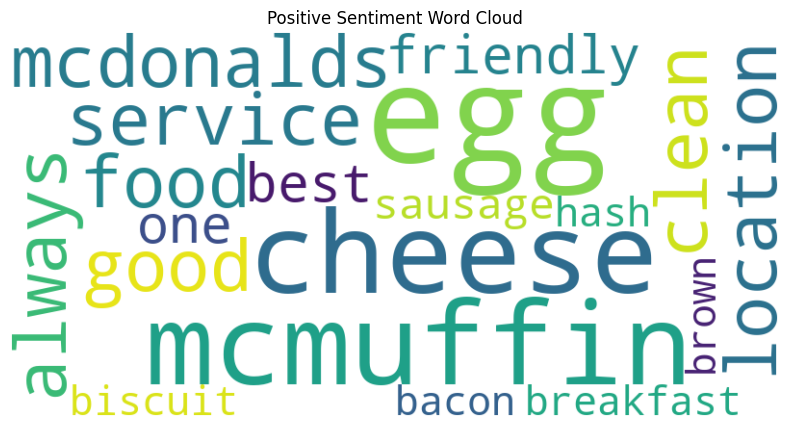

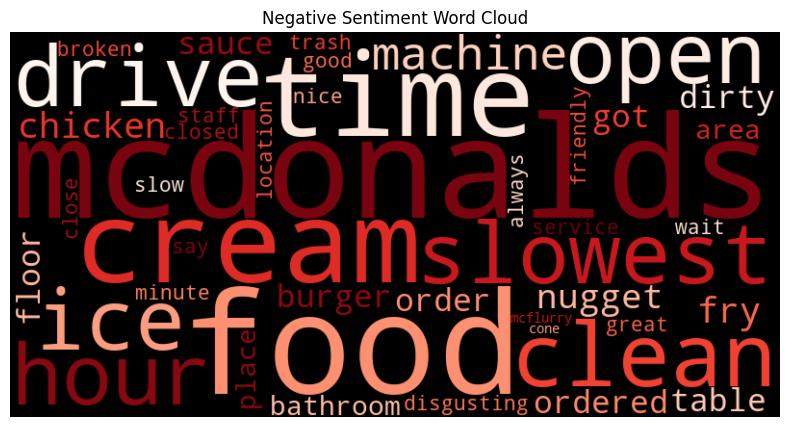

In [277]:

positive_words = []
negative_words = []

for topic, percentage in positive_sentiment_percentage_by_topic.items():
    words = " ".join(representations_updated.get(topic, []))
    if percentage >= 50:
        positive_words.append(words)
    else:
        negative_words.append(words)

positive_text = " ".join(positive_words)
negative_text = " ".join(negative_words)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Sentiment Word Cloud')
plt.show()

# Plotting the negative sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Sentiment Word Cloud')
plt.show()

# 4. Classification Prediction: Regular ML

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [279]:
X = df['clean_review'] 
y = df['review_stars']  

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [281]:
print('Shape of the X train set: ', X_train.shape)
print('Shape of the X test set: ', X_test.shape)
print('Shape of the y train set: ', y_train.shape)
print('Shape of the y test set: ', y_test.shape)

Shape of the X train set:  (2325,)
Shape of the X test set:  (775,)
Shape of the y train set:  (2325,)
Shape of the y test set:  (775,)


In [284]:
from sklearn.metrics import classification_report

In [285]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.naive_bayes import GaussianNB

In [286]:
import eli5
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [287]:
def convert_to_dense(x):
    return x.toarray()

In [288]:
text_preprocessing = Pipeline([
    ('tfidvectorizer', TfidfVectorizer(dtype=np.float32, max_features = 700, ngram_range=(1, 2), min_df=20)), 
    ('to_dense', FunctionTransformer(convert_to_dense, accept_sparse=True)),
    ('standard_scaler', StandardScaler(with_mean=True)) 
])

In [311]:
def evaluate_model(pipeline, X_train, y_train, X_test, y_test, model_name="Model"):
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100.0
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100.0
    
    print(f"{model_name} Training accuracy: {train_accuracy:.2f}%")
    print(f"{model_name} Test accuracy: {test_accuracy:.2f}%")
    
    if train_accuracy > test_accuracy:
        print(f"{model_name} might be overfitting.")
    elif train_accuracy < test_accuracy:
        print(f"{model_name} might be underfitting.")
    else:
        print(f"{model_name} has similar performance on training and test sets.")
    
    print(f"\n{model_name} Classification Report (Training Data):")
    print(classification_report(y_train, y_train_pred))
    
    print(f"\n{model_name} Classification Report (Test Data):")
    print(classification_report(y_test, y_test_pred))
    
    cm_train = confusion_matrix(y_train, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot(cmap=plt.cm.Blues, values_format='d')
    
    plt.title(f"{model_name} Training Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()
    
    cm_test = confusion_matrix(y_test, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap=plt.cm.Blues, values_format='d')
    
    plt.title(f"{model_name} Test Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

## (1) Naive Bayes

In [290]:
full_pipeline_gaussian = Pipeline([
    ('text_preprocessing', text_preprocessing),
    ('classifier', GaussianNB())
])

In [291]:
full_pipeline_gaussian.fit(X_train, y_train)

Pipeline(steps=[('text_preprocessing',
                 Pipeline(steps=[('tfidvectorizer',
                                  TfidfVectorizer(dtype=<class 'numpy.float32'>,
                                                  max_features=700, min_df=20,
                                                  ngram_range=(1, 2))),
                                 ('to_dense',
                                  FunctionTransformer(accept_sparse=True,
                                                      func=<function convert_to_dense at 0x000001B5530976A0>)),
                                 ('standard_scaler', StandardScaler())])),
                ('classifier', GaussianNB())])

Naive Bayes Training accuracy: 92.26%
Naive Bayes Test accuracy: 89.16%
Naive Bayes might be overfitting.

Naive Bayes Classification Report (Training Data):
              precision    recall  f1-score   support

           1       0.89      0.96      0.92      1152
           5       0.96      0.89      0.92      1173

    accuracy                           0.92      2325
   macro avg       0.92      0.92      0.92      2325
weighted avg       0.92      0.92      0.92      2325


Naive Bayes Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.87      0.93      0.90       398
           5       0.92      0.85      0.88       377

    accuracy                           0.89       775
   macro avg       0.89      0.89      0.89       775
weighted avg       0.89      0.89      0.89       775



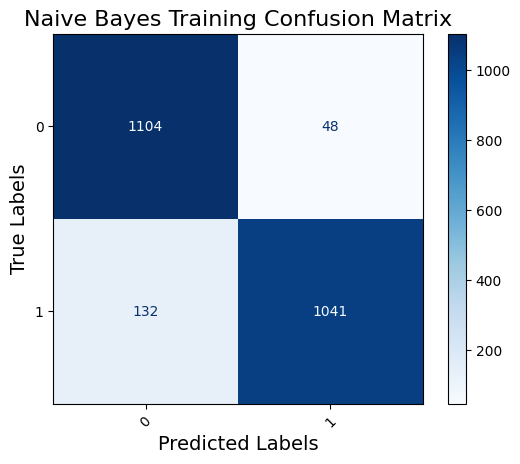

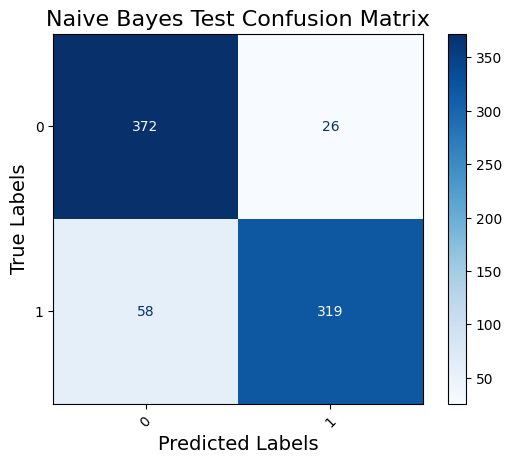

In [294]:
evaluate_model(full_pipeline_gaussian, X_train, y_train, X_test, y_test, model_name="Naive Bayes")

## (2) Logistic Regression

In [295]:
from sklearn.linear_model import LogisticRegression

In [296]:
full_pipeline_logreg = Pipeline([
    ('text_preprocessing', text_preprocessing),
    ('classifier', LogisticRegression(verbose=True)) 
])

In [297]:
full_pipeline_logreg.fit(X_train,y_train)

Pipeline(steps=[('text_preprocessing',
                 Pipeline(steps=[('tfidvectorizer',
                                  TfidfVectorizer(dtype=<class 'numpy.float32'>,
                                                  max_features=700, min_df=20,
                                                  ngram_range=(1, 2))),
                                 ('to_dense',
                                  FunctionTransformer(accept_sparse=True,
                                                      func=<function convert_to_dense at 0x000001B5530976A0>)),
                                 ('standard_scaler', StandardScaler())])),
                ('classifier', LogisticRegression(verbose=True))])

Logistic Regression Training accuracy: 100.00%
Logistic Regression Test accuracy: 88.00%
Logistic Regression might be overfitting.

Logistic Regression Classification Report (Training Data):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1152
           5       1.00      1.00      1.00      1173

    accuracy                           1.00      2325
   macro avg       1.00      1.00      1.00      2325
weighted avg       1.00      1.00      1.00      2325


Logistic Regression Classification Report (Test Data):
              precision    recall  f1-score   support

           1       0.89      0.88      0.88       398
           5       0.87      0.88      0.88       377

    accuracy                           0.88       775
   macro avg       0.88      0.88      0.88       775
weighted avg       0.88      0.88      0.88       775



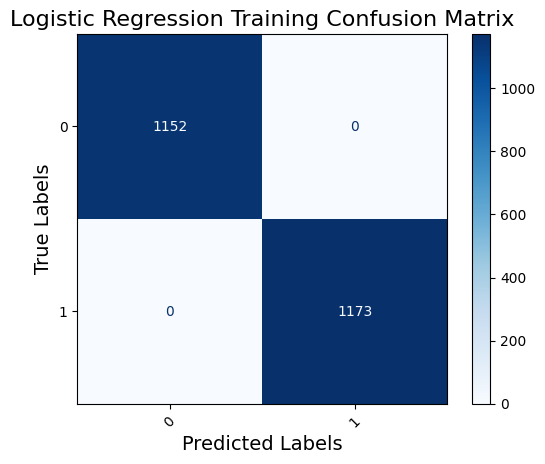

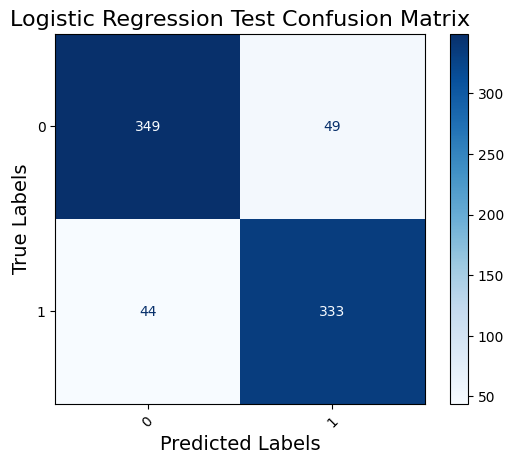

In [298]:
evaluate_model(full_pipeline_logreg, X_train, y_train, X_test, y_test, model_name="Logistic Regression")

In [299]:
import eli5
from eli5.sklearn import explain_weights

In [79]:
feature_names_list = full_pipeline_logreg.named_steps['text_preprocessing'].named_steps['tfidvectorizer'].get_feature_names_out()

eli5.show_weights(
    full_pipeline_logreg.named_steps['classifier'], 
    top=10, 
    feature_names=feature_names_list 
)

# 5. LSTM

In [563]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.utils import to_categorical


In [564]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['clean_review'], df['review_stars'], test_size=0.2, random_state=42)

In [565]:
def evaluate_keras_model(model, X_train, y_train, X_test, y_test, model_name="Keras Model"):
    y_train_pred_prob = model.predict(X_train)
    y_test_pred_prob = model.predict(X_test)
    
    y_train_pred = y_train_pred_prob.argmax(axis=1)
    y_test_pred = y_test_pred_prob.argmax(axis=1)
    
    y_train_single = y_train.argmax(axis=1)
    y_test_single = y_test.argmax(axis=1)
    
    train_accuracy = accuracy_score(y_train_single, y_train_pred) * 100.0
    test_accuracy = accuracy_score(y_test_single, y_test_pred) * 100.0
    
    print(f"{model_name} Training accuracy: {train_accuracy:.2f}%")
    print(f"{model_name} Test accuracy: {test_accuracy:.2f}%")
    
    if train_accuracy > test_accuracy:
        print(f"{model_name} might be overfitting.")
    elif train_accuracy < test_accuracy:
        print(f"{model_name} might be underfitting.")
    else:
        print(f"{model_name} has similar performance on training and test sets.")
    
    print(f"\n{model_name} Classification Report (Training Data):")
    print(classification_report(y_train_single, y_train_pred))
    
    print(f"\n{model_name} Classification Report (Test Data):")
    print(classification_report(y_test_single, y_test_pred))
    
    cm_train = confusion_matrix(y_train_single, y_train_pred)
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
    disp_train.plot(cmap=plt.cm.Blues, values_format='d')
    
    plt.title(f"{model_name} Training Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()
    
    cm_test = confusion_matrix(y_test_single, y_test_pred)
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
    disp_test.plot(cmap=plt.cm.Blues, values_format='d')
    
    plt.title(f"{model_name} Test Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Labels", fontsize=14)
    plt.ylabel("True Labels", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

In [566]:
max_words = 10000  
max_len = 100      

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.2f}")

test_predictions = model.predict(test_data)

Epoch 1/10
62/62 [==============================] - 11s 127ms/step - loss: 0.4964 - accuracy: 0.7465 - val_loss: 0.2315 - val_accuracy: 0.9234
Epoch 2/10
62/62 [==============================] - 7s 120ms/step - loss: 0.1337 - accuracy: 0.9632 - val_loss: 0.4166 - val_accuracy: 0.8992
Epoch 3/10
62/62 [==============================] - 7s 108ms/step - loss: 0.0398 - accuracy: 0.9924 - val_loss: 0.4077 - val_accuracy: 0.8992
Epoch 4/10
62/62 [==============================] - 7s 116ms/step - loss: 0.0287 - accuracy: 0.9929 - val_loss: 0.5366 - val_accuracy: 0.8911
Epoch 5/10
62/62 [==============================] - 7s 121ms/step - loss: 0.0147 - accuracy: 0.9975 - val_loss: 0.5950 - val_accuracy: 0.8992
Epoch 6/10
62/62 [==============================] - 7s 116ms/step - loss: 0.0165 - accuracy: 0.9955 - val_loss: 0.6206 - val_accuracy: 0.8750
Epoch 7/10
62/62 [==============================] - 7s 113ms/step - loss: 0.0184 - accuracy: 0.9970 - val_loss: 0.4105 - val_accuracy: 0.8831
Epoch

20/20 [==============================] - 1s 44ms/step
Keras Model Training accuracy: 97.74%
Keras Model Test accuracy: 89.68%
Keras Model might be overfitting.

Keras Model Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1235
           1       0.98      0.97      0.98      1245

    accuracy                           0.98      2480
   macro avg       0.98      0.98      0.98      2480
weighted avg       0.98      0.98      0.98      2480


Keras Model Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       315
           1       0.91      0.88      0.89       305

    accuracy                           0.90       620
   macro avg       0.90      0.90      0.90       620
weighted avg       0.90      0.90      0.90       620



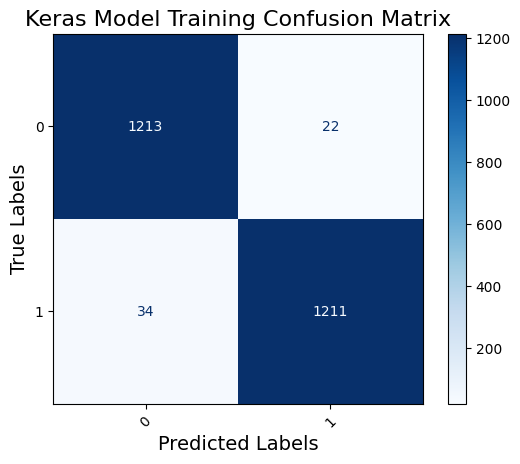

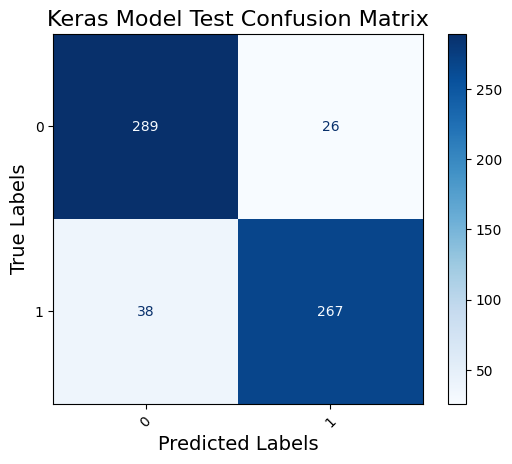

In [567]:
evaluate_keras_model(model, train_data, train_labels, test_data, test_labels)

In [348]:
feature_names_list = full_pipeline_logreg.named_steps['text_preprocessing'].named_steps['tfidvectorizer'].get_feature_names_out()

explanation = eli5.show_weights(
    full_pipeline_logreg.named_steps['classifier'], 
    top=10, 
    feature_names=feature_names_list
)

display(explanation)

# 6. LSTM + Bayesian Grid

In [514]:
import numpy as np
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [515]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['clean_review'], df['review_stars'], test_size=0.2, random_state=42)

In [517]:
def create_model(embedding_dim, lstm_units, dropout_rate, dense_units, optimizer):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Bidirectional(LSTM(lstm_units, return_sequences=True)),
        Dropout(dropout_rate),
        LSTM(lstm_units),
        Dense(dense_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [518]:
def objective(trial):
    embedding_dim = trial.suggest_int('embedding_dim', 50, 300)
    lstm_units = trial.suggest_int('lstm_units', 32, 256)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.7)
    dense_units = trial.suggest_int('dense_units', 16, 128)
    optimizer_choice = trial.suggest_categorical('optimizer', ['adam', 'rmsprop', 'sgd'])
    
    if optimizer_choice == 'adam':
        optimizer = Adam()
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop()
    else:
        optimizer = SGD()

    model = create_model(embedding_dim, lstm_units, dropout_rate, dense_units, optimizer)
    history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    val_accuracy = np.max(history.history['val_accuracy'])
    return val_accuracy

In [516]:
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [519]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)


[I 2024-05-23 08:14:45,281] A new study created in memory with name: no-name-0f73f803-505e-4705-8889-8bf1b76924f4


[I 2024-05-23 08:15:50,449] Trial 0 finished with value: 0.9173387289047241 and parameters: {'embedding_dim': 232, 'lstm_units': 56, 'dropout_rate': 0.16637731112177068, 'dense_units': 60, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9173387289047241.
[I 2024-05-23 08:21:24,694] Trial 1 finished with value: 0.5947580933570862 and parameters: {'embedding_dim': 87, 'lstm_units': 234, 'dropout_rate': 0.4999311118129376, 'dense_units': 20, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.9173387289047241.
[I 2024-05-23 08:25:27,844] Trial 2 finished with value: 0.899193525314331 and parameters: {'embedding_dim': 189, 'lstm_units': 159, 'dropout_rate': 0.6197426734261137, 'dense_units': 31, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.9173387289047241.
[I 2024-05-23 08:28:06,844] Trial 3 finished with value: 0.8951612710952759 and parameters: {'embedding_dim': 225, 'lstm_units': 124, 'dropout_rate': 0.5355725138022198, 'dense_units': 19, 'optimizer': 'adam'}. Best is tria

In [520]:
print("Best parameters found: ", study.best_params)

Best parameters found:  {'embedding_dim': 243, 'lstm_units': 56, 'dropout_rate': 0.3550721808637449, 'dense_units': 106, 'optimizer': 'adam'}


In [524]:

best_params = study.best_params
best_optimizer = best_params.pop('optimizer')
if best_optimizer == 'adam':
    best_optimizer = Adam()
elif best_optimizer == 'rmsprop':
    best_optimizer = RMSprop()
else:
    best_optimizer = SGD()

best_model = create_model(**best_params, optimizer=best_optimizer)
best_model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
loss, accuracy = best_model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.2f}")

test_predictions = best_model.predict(test_data)

Epoch 1/10
62/62 [==============================] - 9s 102ms/step - loss: 0.4538 - accuracy: 0.7999 - val_loss: 0.2463 - val_accuracy: 0.8992
Epoch 2/10
62/62 [==============================] - 6s 89ms/step - loss: 0.0896 - accuracy: 0.9708 - val_loss: 0.2862 - val_accuracy: 0.9073
Epoch 3/10
62/62 [==============================] - 6s 93ms/step - loss: 0.0218 - accuracy: 0.9940 - val_loss: 0.3844 - val_accuracy: 0.9052
Epoch 4/10
62/62 [==============================] - 6s 103ms/step - loss: 0.0141 - accuracy: 0.9955 - val_loss: 0.4981 - val_accuracy: 0.8972
Epoch 5/10
62/62 [==============================] - 7s 106ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.4911 - val_accuracy: 0.8952
Epoch 6/10
62/62 [==============================] - 8s 125ms/step - loss: 0.0018 - accuracy: 0.9990 - val_loss: 0.5933 - val_accuracy: 0.8952
Epoch 7/10
62/62 [==============================] - 13s 215ms/step - loss: 0.0064 - accuracy: 0.9990 - val_loss: 0.5359 - val_accuracy: 0.8770
Epoch 8

20/20 [==============================] - 1s 25ms/step
Keras Model Training accuracy: 97.78%
Keras Model Test accuracy: 90.81%
Keras Model might be overfitting.

Keras Model Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1235
           1       0.98      0.98      0.98      1245

    accuracy                           0.98      2480
   macro avg       0.98      0.98      0.98      2480
weighted avg       0.98      0.98      0.98      2480


Keras Model Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       315
           1       0.91      0.90      0.91       305

    accuracy                           0.91       620
   macro avg       0.91      0.91      0.91       620
weighted avg       0.91      0.91      0.91       620



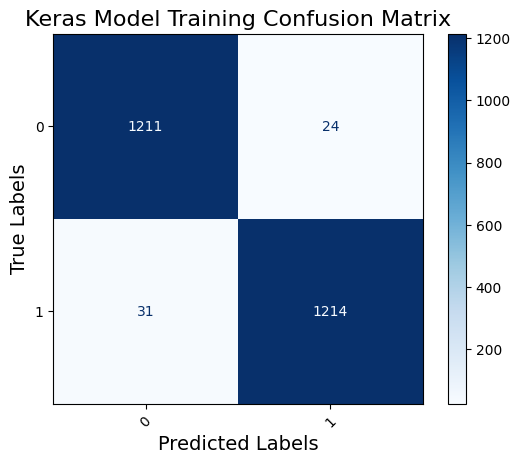

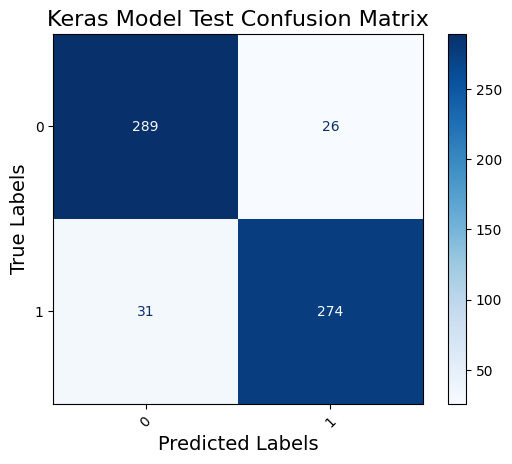

In [523]:
evaluate_keras_model(best_model, train_data, train_labels, test_data, test_labels)

# 6. LSTM + Bayesian Grid + Regularization

In [571]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [654]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['clean_review'], df['review_stars'], test_size=0.2, random_state=42)
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

best_params = {'embedding_dim': 243, 'lstm_units': 56, 'dropout_rate': 0.3550721808637449, 'dense_units': 106, 'optimizer': 'adam'}

def create_model(embedding_dim, lstm_units, dropout_rate, dense_units, optimizer, l2_strength=0.001):
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len, embeddings_regularizer=l2(l2_strength)),
        Bidirectional(LSTM(lstm_units, kernel_regularizer=l2(l2_strength), recurrent_regularizer=l2(l2_strength))),
        Dropout(dropout_rate),
        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_strength)),
        Dropout(dropout_rate + 0.1),
        Dense(2, activation='softmax', kernel_regularizer=l2(l2_strength))
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

best_optimizer = best_params.pop('optimizer')
if best_optimizer == 'adam':
    best_optimizer = Adam()
elif best_optimizer == 'rmsprop':
    best_optimizer = RMSprop()
else:
    best_optimizer = SGD()

model = create_model(**best_params, optimizer=best_optimizer)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.2f}")

test_predictions = model.predict(test_data)
print(f"Test Predictions: {test_predictions}")

Epoch 1/20
62/62 [==============================] - 8s 87ms/step - loss: 1.5151 - accuracy: 0.6331 - val_loss: 0.6414 - val_accuracy: 0.8569
Epoch 2/20
62/62 [==============================] - 5s 82ms/step - loss: 0.4279 - accuracy: 0.9199 - val_loss: 0.4246 - val_accuracy: 0.9093
Epoch 3/20
62/62 [==============================] - 5s 83ms/step - loss: 0.2374 - accuracy: 0.9743 - val_loss: 0.5078 - val_accuracy: 0.9093
Epoch 4/20
62/62 [==============================] - 5s 87ms/step - loss: 0.2226 - accuracy: 0.9773 - val_loss: 0.4368 - val_accuracy: 0.9153
Epoch 5/20
20/20 [==============================] - 1s 26ms/step - loss: 0.4336 - accuracy: 0.9065
Test Accuracy: 0.91
20/20 [==============================] - 1s 26ms/step
Test Predictions: [[0.05050496 0.949495  ]
 [0.98779684 0.01220311]
 [0.97448164 0.02551838]
 ...
 [0.99364716 0.00635282]
 [0.97845626 0.02154371]
 [0.01081955 0.9891804 ]]


20/20 [==============================] - 1s 26ms/step
Keras Model Training accuracy: 96.81%
Keras Model Test accuracy: 90.65%
Keras Model might be overfitting.

Keras Model Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1235
           1       0.99      0.95      0.97      1245

    accuracy                           0.97      2480
   macro avg       0.97      0.97      0.97      2480
weighted avg       0.97      0.97      0.97      2480


Keras Model Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       315
           1       0.95      0.86      0.90       305

    accuracy                           0.91       620
   macro avg       0.91      0.91      0.91       620
weighted avg       0.91      0.91      0.91       620



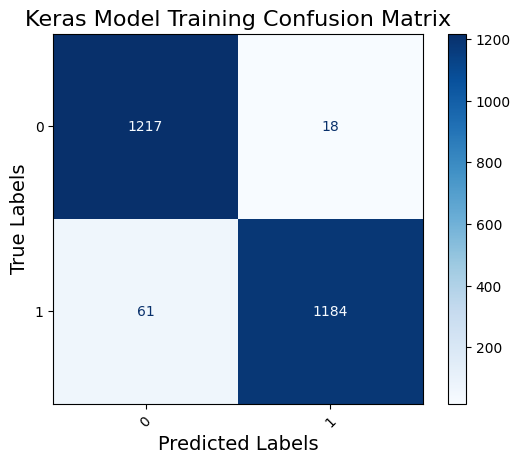

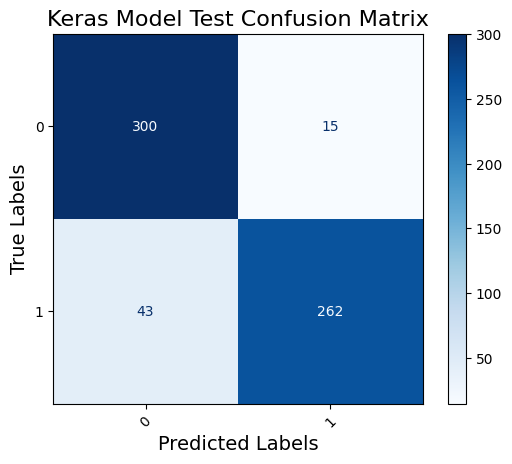

In [655]:
evaluate_keras_model(model, train_data, train_labels, test_data, test_labels)

# 7. Neural Network

In [594]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Dense, GlobalAveragePooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [656]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['clean_review'], df['review_stars'], test_size=0.2, random_state=42)
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    GlobalAveragePooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)


loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.2f}")

test_predictions = model.predict(test_data)
print(f"Test Predictions: {test_predictions}")

Epoch 1/20
62/62 [==============================] - 1s 11ms/step - loss: 0.6867 - accuracy: 0.5675 - val_loss: 0.6748 - val_accuracy: 0.6028
Epoch 2/20
62/62 [==============================] - 1s 9ms/step - loss: 0.6525 - accuracy: 0.6749 - val_loss: 0.6015 - val_accuracy: 0.7843
Epoch 3/20
62/62 [==============================] - 0s 8ms/step - loss: 0.5037 - accuracy: 0.8251 - val_loss: 0.4030 - val_accuracy: 0.8972
Epoch 4/20
62/62 [==============================] - 1s 8ms/step - loss: 0.2893 - accuracy: 0.9163 - val_loss: 0.2704 - val_accuracy: 0.9093
Epoch 5/20
62/62 [==============================] - 0s 8ms/step - loss: 0.1701 - accuracy: 0.9546 - val_loss: 0.2543 - val_accuracy: 0.9052
Epoch 6/20
62/62 [==============================] - 1s 8ms/step - loss: 0.1155 - accuracy: 0.9723 - val_loss: 0.2250 - val_accuracy: 0.9234
Epoch 7/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0813 - accuracy: 0.9819 - val_loss: 0.2223 - val_accuracy: 0.9214
Epoch 8/20
62/62 [=

20/20 [==============================] - 0s 810us/step
Keras Model Training accuracy: 97.66%
Keras Model Test accuracy: 91.77%
Keras Model might be overfitting.

Keras Model Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1235
           1       0.98      0.97      0.98      1245

    accuracy                           0.98      2480
   macro avg       0.98      0.98      0.98      2480
weighted avg       0.98      0.98      0.98      2480


Keras Model Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       315
           1       0.93      0.90      0.92       305

    accuracy                           0.92       620
   macro avg       0.92      0.92      0.92       620
weighted avg       0.92      0.92      0.92       620



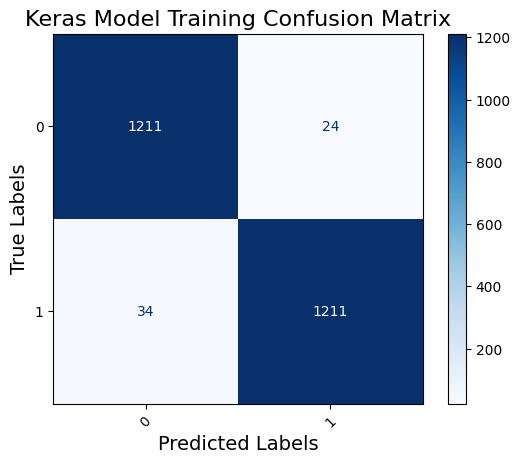

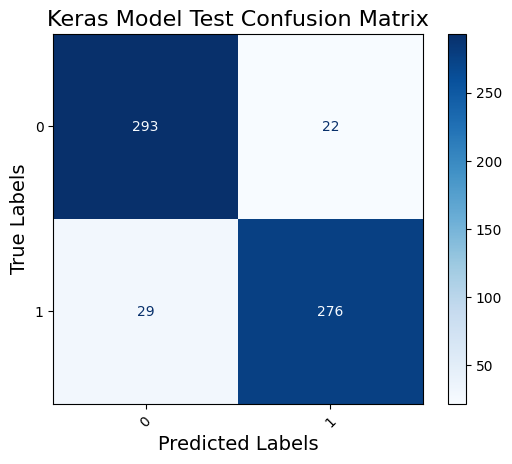

In [657]:
evaluate_keras_model(model, train_data, train_labels, test_data, test_labels)

# 7. Neural Network + Regularization

In [690]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dropout, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [695]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['clean_review'], df['review_stars'], test_size=0.2, random_state=42)

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential([
    Embedding(input_dim=max_words, output_dim=64, input_length=max_len), 
    GlobalAveragePooling1D(),
    Dropout(0.35),  
    Dense(32, activation='relu', kernel_regularizer=l2(0.05)),  
    Dense(2, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.2f}")

test_predictions = model.predict(test_data)
print(f"Test Predictions: {test_predictions}")

Epoch 1/20
62/62 [==============================] - 1s 6ms/step - loss: 2.1022 - accuracy: 0.5529 - val_loss: 1.5832 - val_accuracy: 0.6290 - lr: 0.0010
Epoch 2/20
62/62 [==============================] - 0s 5ms/step - loss: 1.2823 - accuracy: 0.7011 - val_loss: 1.0420 - val_accuracy: 0.7399 - lr: 0.0010
Epoch 3/20
62/62 [==============================] - 0s 5ms/step - loss: 0.9037 - accuracy: 0.7293 - val_loss: 0.7952 - val_accuracy: 0.7298 - lr: 0.0010
Epoch 4/20
62/62 [==============================] - 0s 5ms/step - loss: 0.7224 - accuracy: 0.7540 - val_loss: 0.6720 - val_accuracy: 0.8044 - lr: 0.0010
Epoch 5/20
62/62 [==============================] - 0s 5ms/step - loss: 0.6131 - accuracy: 0.8241 - val_loss: 0.5905 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 6/20
62/62 [==============================] - 0s 5ms/step - loss: 0.5237 - accuracy: 0.8972 - val_loss: 0.5234 - val_accuracy: 0.8609 - lr: 0.0010
Epoch 7/20
62/62 [==============================] - 0s 5ms/step - loss: 0.4506 - a

20/20 [==============================] - 0s 1ms/step
Keras Model Training accuracy: 97.70%
Keras Model Test accuracy: 91.61%
Keras Model might be overfitting.

Keras Model Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1235
           1       0.99      0.97      0.98      1245

    accuracy                           0.98      2480
   macro avg       0.98      0.98      0.98      2480
weighted avg       0.98      0.98      0.98      2480


Keras Model Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       315
           1       0.93      0.89      0.91       305

    accuracy                           0.92       620
   macro avg       0.92      0.92      0.92       620
weighted avg       0.92      0.92      0.92       620



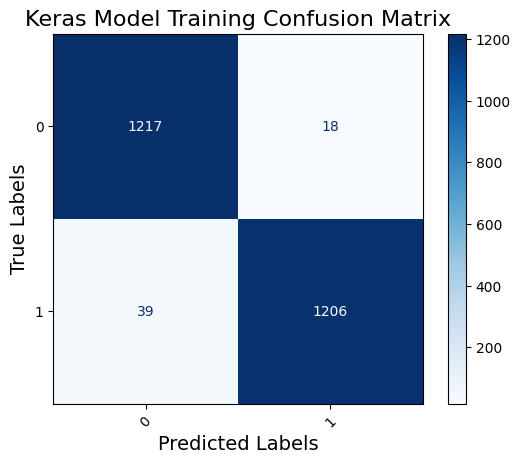

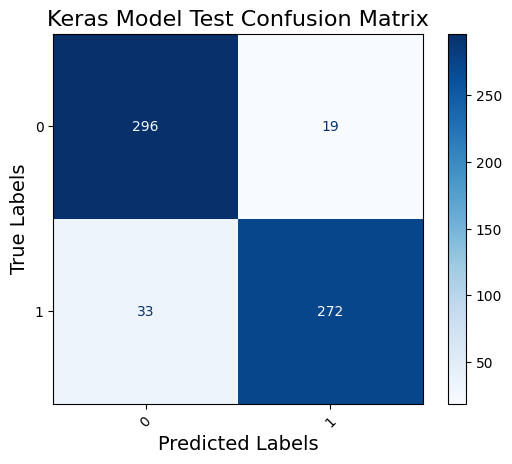

In [697]:
evaluate_keras_model(model, train_data, train_labels, test_data, test_labels)

# 7. Neural Network + Regularization + Search

In [698]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['clean_review'], df['review_stars'], test_size=0.2, random_state=42)

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

train_data = pad_sequences(train_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def objective(trial):
    output_dim = trial.suggest_int('output_dim', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    l2_value = trial.suggest_float('l2_value', 0.01, 0.1)
    neurons = trial.suggest_int('neurons', 16, 128)
    optimizer = trial.suggest_categorical('optimizer', ['adam', 'rmsprop'])
    
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=output_dim, input_length=max_len),
        GlobalAveragePooling1D(),
        Dropout(dropout_rate),
        Dense(neurons, activation='relu', kernel_regularizer=l2(l2_value)),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)
    
    history = model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_split=0.2,
                        callbacks=[early_stopping, reduce_lr], verbose=0)
    
    loss, accuracy = model.evaluate(test_data, test_labels, verbose=0)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best hyperparameters: ", study.best_params)

best_params = study.best_params
output_dim = best_params['output_dim']
dropout_rate = best_params['dropout_rate']
l2_value = best_params['l2_value']
neurons = best_params['neurons']
optimizer_choice = best_params['optimizer']

best_model = Sequential([
    Embedding(input_dim=max_words, output_dim=output_dim, input_length=max_len),
    GlobalAveragePooling1D(),
    Dropout(dropout_rate),
    Dense(neurons, activation='relu', kernel_regularizer=l2(l2_value)),
    Dense(2, activation='softmax')
])
best_model.compile(optimizer=optimizer_choice, loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=0.00001)

history = best_model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr], verbose=1)

loss, accuracy = best_model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {accuracy:.2f}")
test_predictions = best_model.predict(test_data)
print(f"Test Predictions: {test_predictions}")

[I 2024-05-23 11:33:47,219] A new study created in memory with name: no-name-3c8e43fb-9128-408a-926b-8362fee2fd87
[I 2024-05-23 11:33:55,501] Trial 0 finished with value: 0.9209677577018738 and parameters: {'output_dim': 87, 'dropout_rate': 0.37798436957266723, 'l2_value': 0.03392295128181596, 'neurons': 32, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9209677577018738.
[I 2024-05-23 11:34:05,485] Trial 1 finished with value: 0.9177419543266296 and parameters: {'output_dim': 118, 'dropout_rate': 0.21048905674330917, 'l2_value': 0.087700375040047, 'neurons': 127, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9209677577018738.
[I 2024-05-23 11:34:11,109] Trial 2 finished with value: 0.6774193644523621 and parameters: {'output_dim': 39, 'dropout_rate': 0.4773708447127232, 'l2_value': 0.07576191373032402, 'neurons': 80, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.9209677577018738.
[I 2024-05-23 11:34:22,865] Trial 3 finished with value: 0.9209677577018738 and parame

Best hyperparameters:  {'output_dim': 105, 'dropout_rate': 0.4217676507892022, 'l2_value': 0.01103322494946899, 'neurons': 20, 'optimizer': 'adam'}
Epoch 1/20
62/62 [==============================] - 1s 9ms/step - loss: 0.9325 - accuracy: 0.5711 - val_loss: 0.8255 - val_accuracy: 0.7218 - lr: 0.0010
Epoch 2/20
62/62 [==============================] - 0s 7ms/step - loss: 0.7638 - accuracy: 0.6915 - val_loss: 0.7080 - val_accuracy: 0.7863 - lr: 0.0010
Epoch 3/20
62/62 [==============================] - 0s 7ms/step - loss: 0.6579 - accuracy: 0.8175 - val_loss: 0.6168 - val_accuracy: 0.8528 - lr: 0.0010
Epoch 4/20
62/62 [==============================] - 0s 7ms/step - loss: 0.5493 - accuracy: 0.8916 - val_loss: 0.5290 - val_accuracy: 0.8931 - lr: 0.0010
Epoch 5/20
62/62 [==============================] - 0s 8ms/step - loss: 0.4495 - accuracy: 0.9254 - val_loss: 0.4663 - val_accuracy: 0.9012 - lr: 0.0010
Epoch 6/20
62/62 [==============================] - 0s 7ms/step - loss: 0.3737 - accura

20/20 [==============================] - 0s 1ms/step
Keras Model Training accuracy: 97.90%
Keras Model Test accuracy: 92.58%
Keras Model might be overfitting.

Keras Model Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1235
           1       0.99      0.97      0.98      1245

    accuracy                           0.98      2480
   macro avg       0.98      0.98      0.98      2480
weighted avg       0.98      0.98      0.98      2480


Keras Model Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       315
           1       0.95      0.90      0.92       305

    accuracy                           0.93       620
   macro avg       0.93      0.93      0.93       620
weighted avg       0.93      0.93      0.93       620



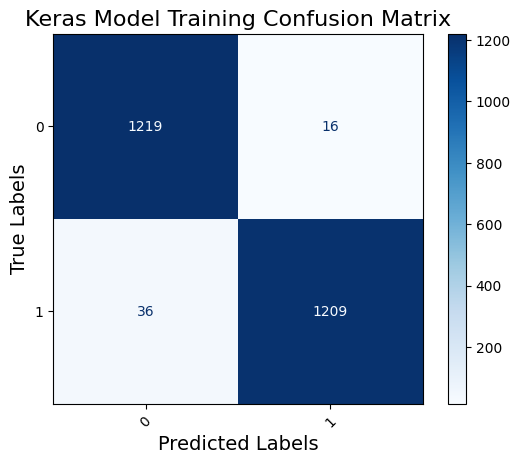

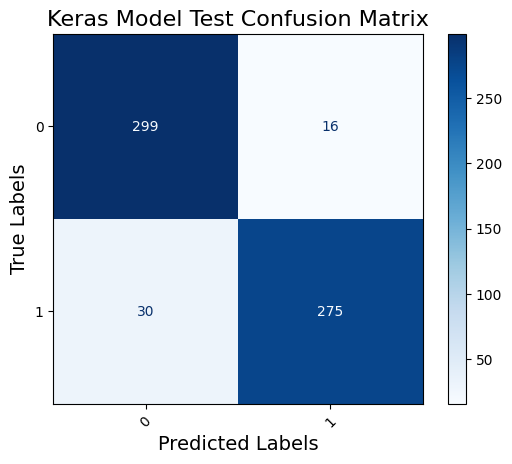

In [699]:
evaluate_keras_model(best_model, train_data, train_labels, test_data, test_labels)

In [705]:
from lime.lime_text import LimeTextExplainer

In [707]:

class_names = ['1', '5'] 

explainer = LimeTextExplainer(class_names=class_names)

def predict_fn(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    data = pad_sequences(sequences, maxlen=max_len)
    return best_model.predict(data)

exp = explainer.explain_instance(test_texts.iloc[i], predict_fn, num_features=10)

exp.show_in_notebook(text=True)

157/157 [==============================] - 0s 1ms/step


# 5. BERT Attempt (Unsuccessful)

In [78]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['clean_review'], df['review_stars'], test_size=0.2, random_state=42)

In [ ]:
df['review_stars'] = df['review_stars'].map({1: 0, 5: 1})

In [79]:
from transformers import AutoTokenizer

c:\Users\vince\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [80]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=128)

c:\Users\vince\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [81]:
import torch
from torch.utils.data import Dataset

In [82]:
class YelpReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx] - 1)  # Adjusting labels to 0-based index
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = YelpReviewDataset(train_encodings, train_labels)
test_dataset = YelpReviewDataset(test_encodings, test_labels)


In [83]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

trainer.train()

c:\Users\vince\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or pre

Abort: 